In [51]:
import sys
import numpy as np
sys.path.append("/Users/mlokken/research/lyman_alpha/software/cupix")
from cupix.likelihood.lya_theory import set_theory
from cupix.likelihood.forestflow_emu import FF_emulator
from cupix.likelihood.input_pipeline import Args
%load_ext autoreload
%autoreload 2
from lace.cosmo import camb_cosmo



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the emulator

In [52]:
# Load emulator
z = np.array([2.2,2.4])
omnuh2 = 0.0006
mnu = omnuh2 * 93.14
H0 = 67.36
omch2 = 0.12
ombh2 = 0.02237
As = 2.1e-9
ns = 0.9649
nrun = 0.0
w = -1.0
omk = 0
cosmo = {
    'H0': H0,
    'omch2': omch2,
    'ombh2': ombh2,
    'mnu': mnu,
    'omk': omk,
    'As': As,
    'ns': ns,
    'nrun': nrun,
    'w': w
}
sim_cosmo = camb_cosmo.get_cosmology_from_dictionary(cosmo)
cc = camb_cosmo.get_camb_results(sim_cosmo, zs=z, camb_kmax_Mpc=1000)
ffemu = FF_emulator(z, cosmo, cc)

 /Users/mlokken/research/lyman_alpha/software/ForestFlow/forestflow/P3D_cINN.py:781: UserWarning:Loading a pre-trained emulator


In [53]:
ffemu.emu_params

['Delta2_p', 'n_p', 'mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']

In [54]:
theta_Mpc = np.linspace(0.1,5,20)
ffemu.kp_Mpc = 1 # pivot point
ffemu.theta = theta_Mpc

Set the theory

In [55]:
emu_params = Args()
emu_params.set_baseline()
# initial_gamma = 1.74
# initial_lambda_pressure = 79.4
theory = set_theory(emu_params, ffemu)
theory.set_fid_cosmo(z)

In [56]:
ffemu.emu_params

['Delta2_p', 'n_p', 'mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']

In [148]:
# theta should be of shape: # (N_z, N_theta, 2)
k_kms = np.array([np.linspace(0.0001,.05,100), np.linspace(0.0001,.03,80)])
theta_bin_deg = np.asarray([[[0,0.01],[0.01,0.1],[.1,.5],[.5,1]], [[0,0.05],[0.05,0.07],[0.07,0.1],[0.1,0.4]]])
theta_bin_deg.shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [149]:
out = theory.get_px_kms(
        zs = z,
        k_kms=k_kms,
        theta_bin_deg=theta_bin_deg,
        return_blob=False
    )

emu call ffemu {'Delta2_p': array([0.69934305, 0.6219795 ]), 'n_p': array([-2.37612299, -2.37612285]), 'mF': array([0.82247582, 0.78956355]), 'sigT_Mpc': array([0.13105014, 0.13014596]), 'gamma': array([1.54611955, 1.53976528]), 'kF_Mpc': array([9.4974917 , 9.76612371])}
Px pred shape before return (2, 1000, 100)
theta fine shape (2, 1000, 1)
px_Mpc_fine shape (2, 1000, 100)
theta_min, theta_max for this bin is 0.0 0.9773189292462569 weights are [0.         0.09782972 0.19565945 0.29348917 0.39131889 0.48914861
 0.58697834 0.68480806 0.78263778 0.8804675 ]
shape is (10, 100)
Weights shape is (10,)
theta_min, theta_max for this bin is 0.9773189292462569 9.773189292462568 weights are [0.97829723 1.07612695 1.17395667 1.27178639 1.36961612 1.46744584
 1.56527556 1.66310529 1.76093501 1.85876473 1.95659445 2.05442418
 2.1522539  2.25008362 2.34791334 2.44574307 2.54357279 2.64140251
 2.73923223 2.83706196 2.93489168 3.0327214  3.13055112 3.22838085
 3.32621057 3.42404029 3.52187002 3.61969

In [150]:
import matplotlib.pyplot as plt

In [151]:
out

[array([[ 9.44195195e+00,  1.15722404e+01,  1.16721837e+01,
          1.12411862e+01,  1.07181785e+01,  1.01944890e+01,
          9.67746765e+00,  9.18087987e+00,  8.71665019e+00,
          8.28532874e+00,  7.88294764e+00,  7.50662016e+00,
          7.15434089e+00,  6.82402665e+00,  6.51350138e+00,
          6.22125335e+00,  5.94575509e+00,  5.68557035e+00,
          5.43943950e+00,  5.20626846e+00,  4.98509748e+00,
          4.77507465e+00,  4.57543397e+00,  4.38548330e+00,
          4.20459563e+00,  4.03220132e+00,  3.86778179e+00,
          3.71086399e+00,  3.56101500e+00,  3.41783732e+00,
          3.28096488e+00,  3.15005955e+00,  3.02480819e+00,
          2.90492007e+00,  2.79012463e+00,  2.68016952e+00,
          2.57481890e+00,  2.47385193e+00,  2.37706149e+00,
          2.28425291e+00,  2.19524304e+00,  2.10985926e+00,
          2.02793866e+00,  1.94932729e+00,  1.87387953e+00,
          1.80145741e+00,  1.73193017e+00,  1.66517367e+00,
          1.60107000e+00,  1.53950707e+0

z= 2.2
z= 2.4


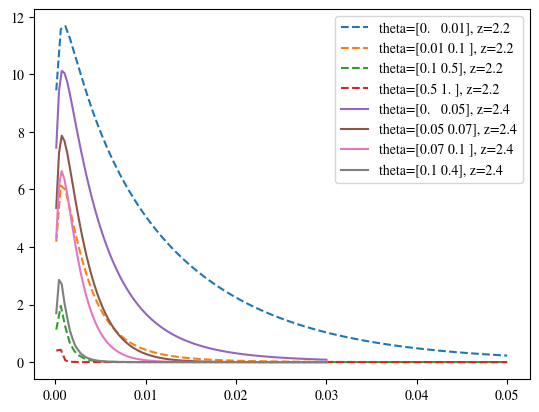

In [152]:
for iz, zbin in enumerate(out):
    print("z=", z[iz])
    if iz==0:
        linestyle='dashed'
    else:
        linestyle='solid'
    
    for itheta, theta in enumerate(zbin):
        # print(out[iz][itheta])
        plt.plot(k_kms[iz], out[iz][itheta], label='theta={}, z={}'.format(theta_bin_deg[iz][itheta], z[iz]), linestyle=linestyle)
    
plt.legend()

Current working version includes option to have different k for different redshift bins, but not for different theta (might want to make this fully generic)
Currently in k km/s-1, but expect Px to be in inverse Angstroms, should change this.